In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
tata_motors = pd.read_csv("C:\\Users\\Pradyumna D S\\Downloads\\Final Year Project\\TATAMOTORS.csv")

In [53]:
print(tata_motors.head())
print(tata_motors['Close'][3988])

         Date Symbol Series  Prev Close   Open    High    Low   Last   Close  \
0  2000-01-03  TELCO     EQ      201.60  207.4  217.25  207.4  217.0  216.75   
1  2000-01-04  TELCO     EQ      216.75  217.0  219.00  206.0  211.9  208.20   
2  2000-01-05  TELCO     EQ      208.20  194.0  217.80  194.0  213.1  213.25   
3  2000-01-06  TELCO     EQ      213.25  215.0  229.90  215.0  222.0  222.10   
4  2000-01-07  TELCO     EQ      222.10  224.0  239.90  223.1  239.9  239.90   

     VWAP   Volume      Turnover  Trades  Deliverable Volume  %Deliverble  
0  214.28   676126  1.448775e+13     NaN                 NaN          NaN  
1  209.50   679215  1.422962e+13     NaN                 NaN          NaN  
2  210.33  1120951  2.357684e+13     NaN                 NaN          NaN  
3  225.29  1968998  4.435932e+13     NaN                 NaN          NaN  
4  236.32  2199431  5.197636e+13     NaN                 NaN          NaN  
401.9


In [54]:
x = (tata_motors['Close']).head(750)  # in Indian markets there are 250-253 trading days in an year

In [55]:
# print(x)

In [56]:
# data = y.head(100)
# x = pd.DataFrame(data)
# x.columns = ['Close']
# print(x)

In [57]:
list1 = []
def stocks(x):
    n = len(x)
    high = max(x)
    low = min(x)
    high_index = x.idxmax()
    low_index = x.idxmin()
    draw_down = high-(0.15*high)                      # target of when to invest.. 0.15 is explicitly given by user
    print(high, high_index, low, low_index , draw_down)
    alert_value=high
    for i in range(n):
        if x[i] <= draw_down and i > high_index:
            if x[i] <= alert_value:              
                print('CMP : ',x[i])
                print('index : ',i+1)
                print('alert triggered\n')
                list1.append(x[i])
                alert_value = x[i] - x[i]*0.15      #investing at every 15% drawdown from the alert value

stocks(x)
print(list1)

258.85 5 58.8 314 220.02250000000004
CMP :  213.65
index :  16
alert triggered

CMP :  180.9
index :  18
alert triggered

CMP :  146.8
index :  43
alert triggered

CMP :  120.35
index :  50
alert triggered

CMP :  92.55
index :  145
alert triggered

CMP :  77.85
index :  194
alert triggered

CMP :  65.3
index :  313
alert triggered

[213.65, 180.9, 146.8, 120.35, 92.55, 77.85, 65.3]


In [58]:
# Using a 200-days span EMA. adjust=False specifies that we are interested in the recursive calculation mode.
tata_motors['EMA'] = tata_motors.Close[0:1000].ewm(span=200, adjust=False).mean()
tata_motors['EMA-50'] = tata_motors.Close[0:1000].ewm(span=50, adjust=False).mean()
# tata_motors['EMA'].head(500)
# tata_motors['EMA-50'].head(100)

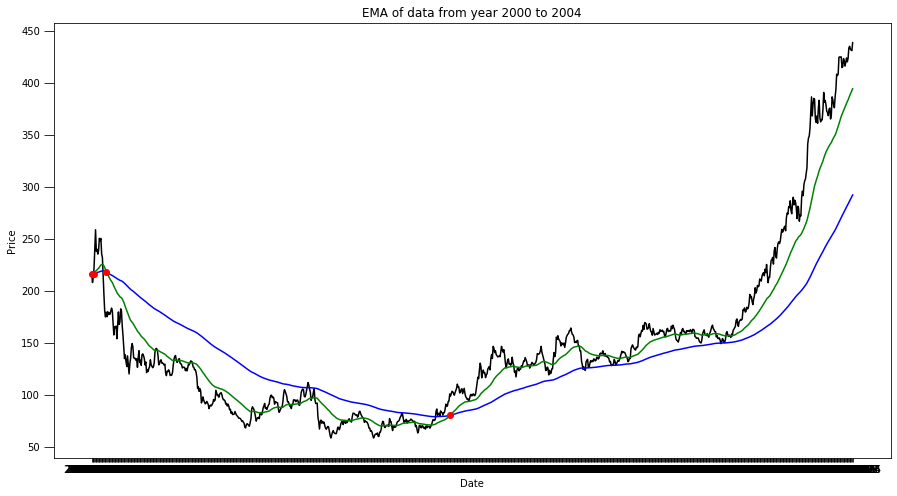

In [59]:
#plotting 200 day EMA for first 1000 data values ie approx 4 years of trading data
plt.figure(figsize=[15,8])
plt.title('EMA of data from year 2000 to 2004')
plt.plot(tata_motors['Date'][0:1000],tata_motors['Close'][0:1000],'black')
plt.plot(tata_motors['Date'][0:1000],tata_motors['EMA'][0:1000],'b-',label="EMA")
plt.plot(tata_motors['Date'][0:1000],tata_motors['EMA-50'][0:1000],'g-',label="EMA")
plt.xlabel('Date')
plt.ylabel('Price')
plt.tick_params(axis='y',length=10)

idx = np.argwhere(np.diff(np.sign(tata_motors['EMA'][0:1000] - tata_motors['EMA-50'][0:1000]))).flatten()
plt.plot(tata_motors['Date'][0:1000][idx], tata_motors['EMA'][0:1000][idx], 'ro')
plt.show()
# plt.savefig("EMA (2000 to 2004).png")

In [60]:
# analysis of moving avg crossover data to have an idea of closest points to buy the stock 
l2 = []
l3=[]
indx = []
def moving_avg_analysis(a,b):
    for i in range(200,len(a)):             # we start from 50th day as we have calculated 50 day EMA
        if a[i] > b[i]+0.03*a[i]:                            # 0.05 added to reduce the volatilty of moving averages
            l2.append(a[i])
            if a[i] < l2[0]:                                 # this is to filter out the values that are unwanted and are > the first element 
                l3.append(a[i])
                indx.append(i)
            
moving_avg_analysis(tata_motors['Close'][0:1000],tata_motors['EMA'][0:1000])
# print(l2)
# print(l3)
# print(len(l3))
# print('\n')
# print(indx)

#the list l3 gives us an idea of the prices when there was an upside crossover between closing price and the moving averages.

In [61]:
# calculating the mean of the obtained EMA data to obtain a price range which is optimal to buy.
mean = sum(l3)/len(l3)
range1 = mean - mean*0.05
range2 = mean + mean*0.05
print('Buy Price Range is ',range1,' to ',range2)

Buy Price Range is  92.7775480769231  to  102.5436057692308


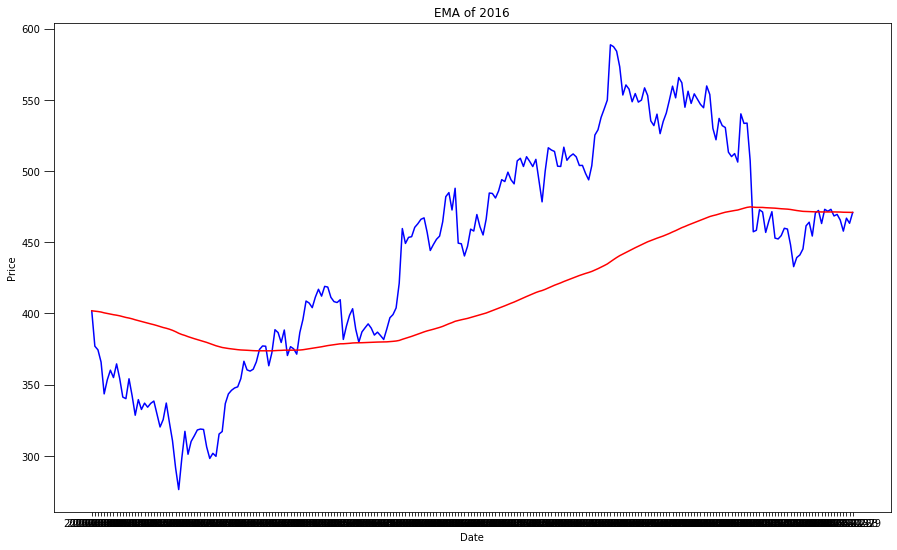

In [62]:
tata_motors['EMA'] = tata_motors.Close[3988:4234].ewm(span=200, adjust=False).mean()
plt.figure(figsize=[15,9])
plt.title('EMA of 2016')
plt.plot(tata_motors['Date'][3988:4234],tata_motors['Close'][3988:4234],'b-',label="Closing Price")
plt.plot(tata_motors['Date'][3988:4234],tata_motors['EMA'][3988:4234],'r-',label="EMA")
plt.xlabel('Date')
plt.ylabel('Price')
plt.tick_params(axis='y',length=10)
plt.show()
# plt.savefig("EMA(2016).png")

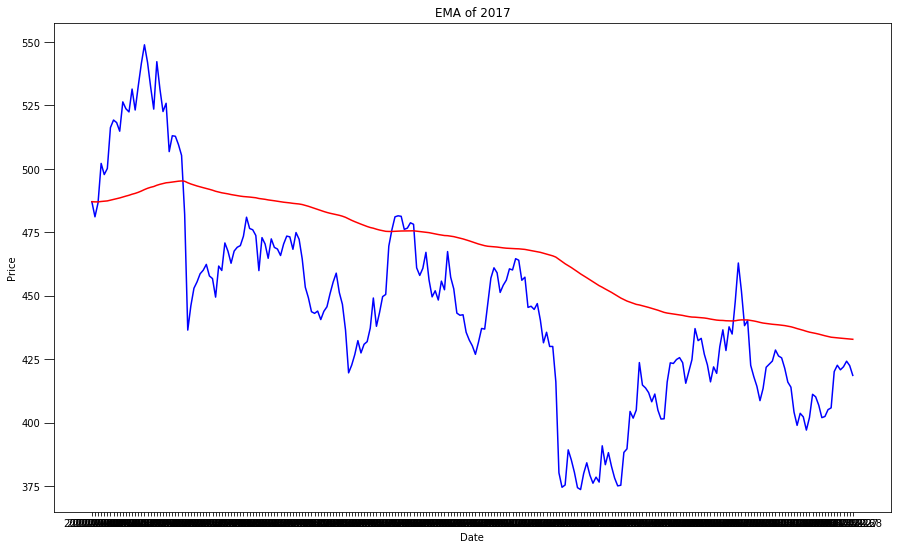

In [63]:
tata_motors['EMA'] = tata_motors.Close[4235:4482].ewm(span=200, adjust=False).mean()
plt.figure(figsize=[15,9])
plt.title('EMA of 2017')
plt.plot(tata_motors['Date'][4235:4482],tata_motors['Close'][4235:4482],'b-',label="Closing Price")
plt.plot(tata_motors['Date'][4235:4482],tata_motors['EMA'][4235:4482],'r-',label="EMA")
plt.xlabel('Date')
plt.ylabel('Price')
plt.tick_params(axis='y',length=10)
plt.show()
# plt.savefig("EMA(2017).png")

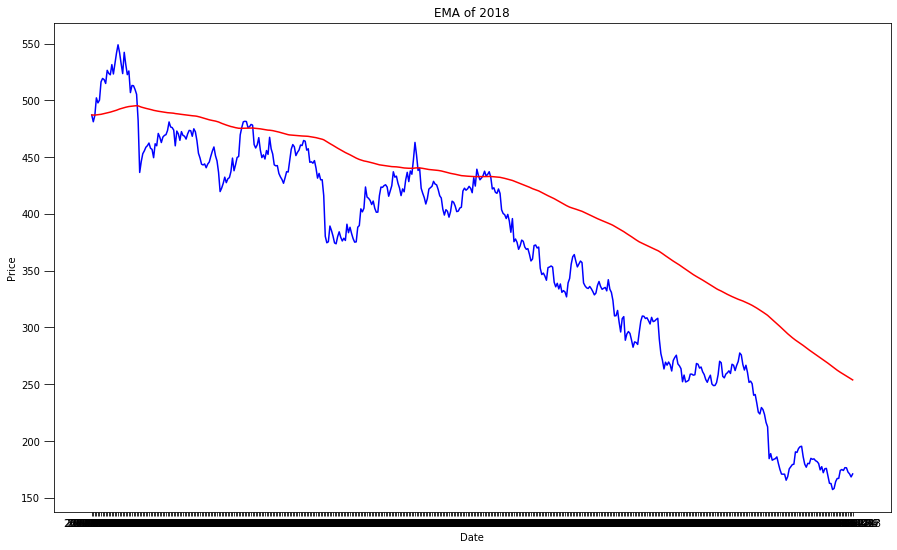

In [64]:
tata_motors['EMA'] = tata_motors.Close[4235:4728].ewm(span=200, adjust=False).mean()
plt.figure(figsize=[15,9])
plt.title('EMA of 2018')
plt.plot(tata_motors['Date'][4235:4728],tata_motors['Close'][4235:4728],'b-',label="Closing Price")
plt.plot(tata_motors['Date'][4235:4728],tata_motors['EMA'][4235:4728],'r-',label="EMA")
plt.xlabel('Date')
plt.ylabel('Price')
plt.tick_params(axis='y',length=10)
plt.show()
# plt.savefig("EMA(2018).png")

  Fib Levels     Price
0         0   604.5500
1      0.236  487.2934
2      0.382  414.7533
3      0.618  297.4967
4         1   107.7000


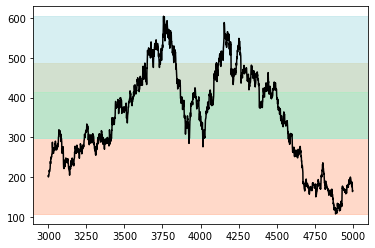

In [65]:
# df = tata_motors['Close'][500:620]
df = tata_motors['Close'][3000:5000]
fig, ax = plt.subplots()
ax.plot(df, color='black')
price_min = df.min()
price_max = df.max()
# Fibonacci Levels considering original trend as upward move
diff = price_max - price_min
level1 = price_max - 0.236 * diff
level2 = price_max - 0.382 * diff
level3 = price_max - 0.618 * diff

data = [("0 ", price_max),
("0.236", level1),
("0.382", level2),
("0.618", level3),
("1 ", price_min)]
print(pd.DataFrame(data,columns=["Fib Levels", "Price"]))


ax.axhspan(level1, price_min, alpha=0.4, color='lightsalmon')
ax.axhspan(level2, level1, alpha=0.5, color='palegoldenrod')
ax.axhspan(level3, level2, alpha=0.5, color='palegreen')
ax.axhspan(price_max, level3, alpha=0.5, color='powderblue')

# ax.plot(df)
# ax.legend(loc=2)
# ax.show()
plt.savefig("fib_retracement.png")

In [68]:
for i in range(df.idxmax(),df.index[-1]):   # iterating from index of max element to the last index
    if df[i] < level3 - df[i]*0.10:         # keeping a buffer of 10% of the price as fluctuations are bound to happen over shorter timeframe
        print(i)S
        print('Stop loss at : ',df[i])
        break

4605
Stop loss at :  263.35
